In [2]:
from langgraph.graph import StateGraph, START, END
from langchain.chat_models import init_chat_model

In [3]:
gemini_llm = init_chat_model(model="gemini-2.0-flash-lite-001", model_provider="google_vertexai")

In [7]:
%pip install -qU "langchain[openai]"

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [8]:
openai_llm = init_chat_model(model="gpt-4o-mini")

In [9]:
gemini_llm.invoke("Where is apple head quarters located ?")

AIMessage(content="Apple's headquarters, often referred to as Apple Park, is located in **Cupertino, California, USA**.\n", additional_kwargs={}, response_metadata={'is_blocked': False, 'safety_ratings': [], 'usage_metadata': {'prompt_token_count': 7, 'candidates_token_count': 24, 'total_token_count': 31, 'prompt_tokens_details': [{'modality': 1, 'token_count': 7}], 'candidates_tokens_details': [{'modality': 1, 'token_count': 24}], 'thoughts_token_count': 0, 'cached_content_token_count': 0, 'cache_tokens_details': []}, 'finish_reason': 'STOP', 'avg_logprobs': -0.09013264377911885, 'model_name': 'gemini-2.0-flash-lite-001'}, id='run--0de50143-31c1-45ea-915e-16aad5808aa7-0', usage_metadata={'input_tokens': 7, 'output_tokens': 24, 'total_tokens': 31})

In [10]:
openai_llm.invoke("Where is apple head quarters located ?")

AIMessage(content="Apple's headquarters is located in Cupertino, California. The main campus is known as Apple Park, which opened in April 2017. It's situated at 1 Apple Park Way, Cupertino, CA 95014.", additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 43, 'prompt_tokens': 14, 'total_tokens': 57, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-mini-2024-07-18', 'system_fingerprint': 'fp_34a54ae93c', 'id': 'chatcmpl-Bd8gaag9A5k5RegF5UsdvOCdgQvHS', 'service_tier': 'default', 'finish_reason': 'stop', 'logprobs': None}, id='run--d8d8216e-10c6-42bc-9ee4-9f5c8b6f8c9a-0', usage_metadata={'input_tokens': 14, 'output_tokens': 43, 'total_tokens': 57, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}})

In [12]:
# Tools are where we have our functionality and we want llm to call our tool
from langchain.tools import tool

@tool("addition", parse_docstring=True, return_direct=True)
def add(a: int, b: int) -> int:
    """Addition of two numbers

    Args:
      a : number
      b : number

    Returns: sum of a, b
    """
    return a + b

In [14]:
gemini_llm_with_tools = gemini_llm.bind_tools([add])

In [15]:
openai_llm_with_tools = openai_llm.bind_tools([add])

In [16]:
result = gemini_llm_with_tools.invoke("What is 2 + 2 ?")

In [17]:
result

AIMessage(content='', additional_kwargs={'function_call': {'name': 'addition', 'arguments': '{"a": 2.0, "b": 2.0}'}}, response_metadata={'is_blocked': False, 'safety_ratings': [], 'usage_metadata': {'prompt_token_count': 22, 'candidates_token_count': 5, 'total_token_count': 27, 'prompt_tokens_details': [{'modality': 1, 'token_count': 22}], 'candidates_tokens_details': [{'modality': 1, 'token_count': 5}], 'thoughts_token_count': 0, 'cached_content_token_count': 0, 'cache_tokens_details': []}, 'finish_reason': 'STOP', 'avg_logprobs': -0.5441222667694092, 'model_name': 'gemini-2.0-flash-lite-001'}, id='run--730cfc0d-6000-4a54-b541-2e006b85c47f-0', tool_calls=[{'name': 'addition', 'args': {'a': 2.0, 'b': 2.0}, 'id': '571801b9-b77c-4426-b5ff-92bddd681901', 'type': 'tool_call'}], usage_metadata={'input_tokens': 22, 'output_tokens': 5, 'total_tokens': 27})

In [18]:
type(result)

langchain_core.messages.ai.AIMessage

In [19]:
result = gemini_llm_with_tools.invoke("I already have 2 pens now i bought 2 more what is the total pens i have ?")

In [20]:
result

AIMessage(content='', additional_kwargs={'function_call': {'name': 'addition', 'arguments': '{"a": 2.0, "b": 2.0}'}}, response_metadata={'is_blocked': False, 'safety_ratings': [], 'usage_metadata': {'prompt_token_count': 34, 'candidates_token_count': 5, 'total_token_count': 39, 'prompt_tokens_details': [{'modality': 1, 'token_count': 34}], 'candidates_tokens_details': [{'modality': 1, 'token_count': 5}], 'thoughts_token_count': 0, 'cached_content_token_count': 0, 'cache_tokens_details': []}, 'finish_reason': 'STOP', 'avg_logprobs': -0.0023159977048635484, 'model_name': 'gemini-2.0-flash-lite-001'}, id='run--8e1718ab-16c1-49b9-bec2-f8049e5026df-0', tool_calls=[{'name': 'addition', 'args': {'a': 2.0, 'b': 2.0}, 'id': 'b593b62b-79a9-4197-843f-6927c669019b', 'type': 'tool_call'}], usage_metadata={'input_tokens': 34, 'output_tokens': 5, 'total_tokens': 39})

In [21]:
result = gemini_llm_with_tools.invoke("What is capital of India?")

In [22]:
result

AIMessage(content='I am sorry, I cannot fulfill this request. The available tools lack the functionality to provide information on countries and their capitals.\n', additional_kwargs={}, response_metadata={'is_blocked': False, 'safety_ratings': [], 'usage_metadata': {'prompt_token_count': 20, 'candidates_token_count': 26, 'total_token_count': 46, 'prompt_tokens_details': [{'modality': 1, 'token_count': 20}], 'candidates_tokens_details': [{'modality': 1, 'token_count': 26}], 'thoughts_token_count': 0, 'cached_content_token_count': 0, 'cache_tokens_details': []}, 'finish_reason': 'STOP', 'avg_logprobs': -0.07492930614031278, 'model_name': 'gemini-2.0-flash-lite-001'}, id='run--0ae102ec-28a2-44c5-ac38-80ebd64f0ceb-0', usage_metadata={'input_tokens': 20, 'output_tokens': 26, 'total_tokens': 46})

In [23]:
from langgraph.graph import MessagesState

In [30]:
@tool("addition", parse_docstring=True, return_direct=True)
def add(a: int, b: int) -> int:
    """Addition of two numbers

    Args:
      a : number
      b : number

    """
    return a + b

In [31]:
@tool("subtraction", parse_docstring=True, return_direct=True)
def sub(a: int, b: int) -> int:
    """Subtract two numbers

    Args:
      a : number
      b : number

    """
    return a - b

In [33]:
@tool("multipy", parse_docstring=True, return_direct=True)
def mul(a: int, b: int) -> int:
    """Multiplication of two numbers

    Args:
      a : number
      b : number

    """
    return a * b

In [34]:
@tool("divide", parse_docstring=True, return_direct=True)
def div(a: int, b: int) -> int:
    """division of two numbers

    Args:
      a : number
      b : number

    """
    return a // b

In [35]:
gemini_llm = init_chat_model(model="gemini-2.0-flash-lite-001", model_provider="google_vertexai")

In [37]:
from langgraph.prebuilt import ToolNode
toolnode = ToolNode([add, sub, mul, div])

In [38]:
gemini_llm_with_tools = gemini_llm.bind_tools([add, sub, mul, div])

In [40]:
def call_model(state: MessagesState) -> MessagesState:
    state['messages'] = gemini_llm_with_tools.invoke(state['messages'])
    return state

In [42]:
tool_graph_builder: StateGraph = StateGraph(MessagesState)
tool_graph_builder.add_node("llm", call_model)
tool_graph_builder.add_node("tools", toolnode)
tool_graph_builder.add_edge(START, "llm")
tool_graph_builder.add_edge("llm", "tools")
tool_graph_builder.add_edge("tools", END)

tools_graph = tool_graph_builder.compile()


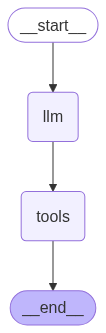

In [43]:
from IPython.display import Image, display
display(Image(tools_graph.get_graph().draw_mermaid_png()))

In [46]:
result = tools_graph.invoke({ "messages": "What is 2 * 5 ?" })

In [47]:
result

{'messages': [HumanMessage(content='What is 2 * 5 ?', additional_kwargs={}, response_metadata={}, id='c6088036-5c44-4b28-ac91-04e287208646'),
  AIMessage(content='', additional_kwargs={'function_call': {'name': 'multipy', 'arguments': '{"a": 2.0, "b": 5.0}'}}, response_metadata={'is_blocked': False, 'safety_ratings': [], 'usage_metadata': {'prompt_token_count': 65, 'candidates_token_count': 6, 'total_token_count': 71, 'prompt_tokens_details': [{'modality': 1, 'token_count': 65}], 'candidates_tokens_details': [{'modality': 1, 'token_count': 6}], 'thoughts_token_count': 0, 'cached_content_token_count': 0, 'cache_tokens_details': []}, 'finish_reason': 'STOP', 'avg_logprobs': -0.00013878751390924057, 'model_name': 'gemini-2.0-flash-lite-001'}, id='run--3ccec097-8dc2-4e3a-997a-778206eedd4b-0', tool_calls=[{'name': 'multipy', 'args': {'a': 2.0, 'b': 5.0}, 'id': '7b4f2a79-8897-48c4-a6e7-0e3f5baf63af', 'type': 'tool_call'}], usage_metadata={'input_tokens': 65, 'output_tokens': 6, 'total_tokens

In [48]:
result = tools_graph.invoke({ "messages": "I have 5 pens, now i purchase 3 more. How many pens do i have ?" })

In [49]:
result

{'messages': [HumanMessage(content='I have 5 pens, now i purchase 3 more. How many pens do i have ?', additional_kwargs={}, response_metadata={}, id='1f38bd07-c385-448b-b532-01072dc049d3'),
  AIMessage(content='', additional_kwargs={'function_call': {'name': 'addition', 'arguments': '{"a": 5.0, "b": 3.0}'}}, response_metadata={'is_blocked': False, 'safety_ratings': [], 'usage_metadata': {'prompt_token_count': 77, 'candidates_token_count': 5, 'total_token_count': 82, 'prompt_tokens_details': [{'modality': 1, 'token_count': 77}], 'candidates_tokens_details': [{'modality': 1, 'token_count': 5}], 'thoughts_token_count': 0, 'cached_content_token_count': 0, 'cache_tokens_details': []}, 'finish_reason': 'STOP', 'avg_logprobs': -0.0003762520384043455, 'model_name': 'gemini-2.0-flash-lite-001'}, id='run--4d988c14-cf9d-46a1-86f0-2a9973f002d9-0', tool_calls=[{'name': 'addition', 'args': {'a': 5.0, 'b': 3.0}, 'id': '98292013-e465-4612-87b8-7e7f114d1454', 'type': 'tool_call'}], usage_metadata={'inp

In [50]:
result = tools_graph.invoke({ "messages": "I have 5 pens, now i lost 3 . How many pens do i have ?" })

In [51]:
result

{'messages': [HumanMessage(content='I have 5 pens, now i lost 3 . How many pens do i have ?', additional_kwargs={}, response_metadata={}, id='1e9c5d4f-6cb3-4412-bdca-5db13d8489a4'),
  AIMessage(content='', additional_kwargs={'function_call': {'name': 'subtraction', 'arguments': '{"a": 5.0, "b": 3.0}'}}, response_metadata={'is_blocked': False, 'safety_ratings': [], 'usage_metadata': {'prompt_token_count': 76, 'candidates_token_count': 6, 'total_token_count': 82, 'prompt_tokens_details': [{'modality': 1, 'token_count': 76}], 'candidates_tokens_details': [{'modality': 1, 'token_count': 6}], 'thoughts_token_count': 0, 'cached_content_token_count': 0, 'cache_tokens_details': []}, 'finish_reason': 'STOP', 'avg_logprobs': -0.0819424440463384, 'model_name': 'gemini-2.0-flash-lite-001'}, id='run--2e913b1b-0e1f-4c46-8ffa-d97f186efca2-0', tool_calls=[{'name': 'subtraction', 'args': {'a': 5.0, 'b': 3.0}, 'id': 'c7b2bbad-4f62-485e-92b4-cdc6ef058a56', 'type': 'tool_call'}], usage_metadata={'input_to